# Problemas de distribución de probabilidad

## Distribución binomial

En teoría de la probabilidad y estadística, la distribución binomial es la distribución de probabilidad discreta que da sólo dos resultados posibles en un experimento; por ejemplo, al lanzar una moneda, puede salir cara o cruz.

In [ ]:
from scipy.stats import binom

# Definir todas las funciones de probabilidad relacionadas con esta distribución.

def dbinom(x, size, prob = 0.5):
    """
    Calcula la estimación puntual de la distribución binomial.
    """
    result = binom.pmf(k = x, n = size, p = prob, loc = 0)

    return result

def pbinom(q, size, prob = 0.5):
    """
    Calcula el acumulado de la distribución binomial.
    """
    result = binom.cdf(k = q, n = size, p = prob, loc = 0)

    return result

def qbinom(p, size, prob = 0.5):
    """
    Calcula la función cuantil a partir de la distribución binomial.
    """
    result = binom.ppf(q = p, n = size, p = prob, loc = 0)

    return result

def rbinom(n, size, prob = 0.5):
    """
    Genera variables aleatorias a partir de la distribución binomial.
    """
    result = binom.rvs(n = size, p = prob, size = n)

    return result

In [ ]:
# Distribución binomial(10, 0.2), dónde n = 10 es el número de ensayos y p = 0.2 es la probabilidad de éxito en un solo ensayo
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

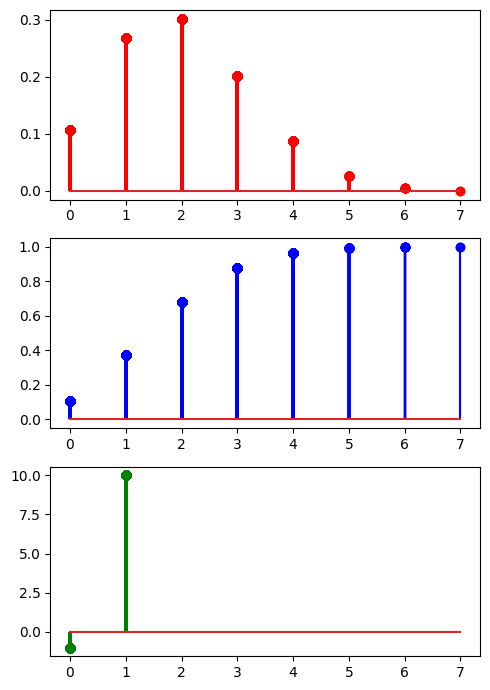

In [3]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data = rbinom(2000, size = 10, prob = 0.2)

pmf = dbinom(data, size = size, prob = prob)
cdf = pbinom(data, size = size, prob = prob)
ppf = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Ejercicio 1

Escriba las funciones anteriores pero para distribuciones normales y uniformes.

In [ ]:
from scipy.stats import norm

def dnorm(x, mean=0, sd=1):

    #estimación puntual de la dist. normal

    return norm.pdf(x, loc=mean, scale=sd)

def pnorm(q, mean=0, sd=1):

    #Acumulado de la dist. normal

    return norm.cdf(q, loc=mean, scale=sd)

def qnorm(p, mean=0, sd=1):

    #Cuantil de la dist. normal

    return norm.ppf(p, loc=mean, scale=sd)

def rnorm(n, mean=0, sd=1):

    #valores aleatorios de dist. normal

    return norm.rvs(loc=mean, scale=sd, size=n)

In [13]:
from scipy.stats import uniform

def dunif(x, min=0, max=1):

    #estimación puntual de la dist. uniforme

    return uniform.pdf(x, loc=min, scale=max-min)

def punif(q, min=0, max=1):

    #Acumulado de la dist. uniforme

    return uniform.cdf(q, loc=min, scale=max-min)

def qunif(p, min=0, max=1):

    #Cuantil de la dist. uniforme

    return uniform.ppf(p, loc=min, scale=max-min)

def runif(n, min=0, max=1):

    #valores aleatorios de dist. uniforme

    return uniform.rvs(loc=min, scale=max-min, size=n)

In [14]:
import numpy as np
np.random.seed(42)

print(dnorm(0, mean=0, sd=1))             # PDF en 0
print(pnorm(1.96, mean=0, sd=1))          # P(X ≤ 1.96)
print(qnorm(0.975, mean=0, sd=1))         # Cuantil 97.5%
print(rnorm(5, mean=0, sd=1))             # 5 muestras

0.3989422804014327
0.9750021048517795
1.959963984540054
[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]


In [15]:
print(dunif(0.5, min=0, max=1))           # PDF en 0.5
print(punif(0.75, min=0, max=1))          # P(X ≤ 0.75)
print(qunif(0.25, min=0, max=1))          # Cuantil 25%
print(runif(5, min=0, max=1))             # 5 muestras

1.0
0.75
0.25
[0.05808361 0.86617615 0.60111501 0.70807258 0.02058449]


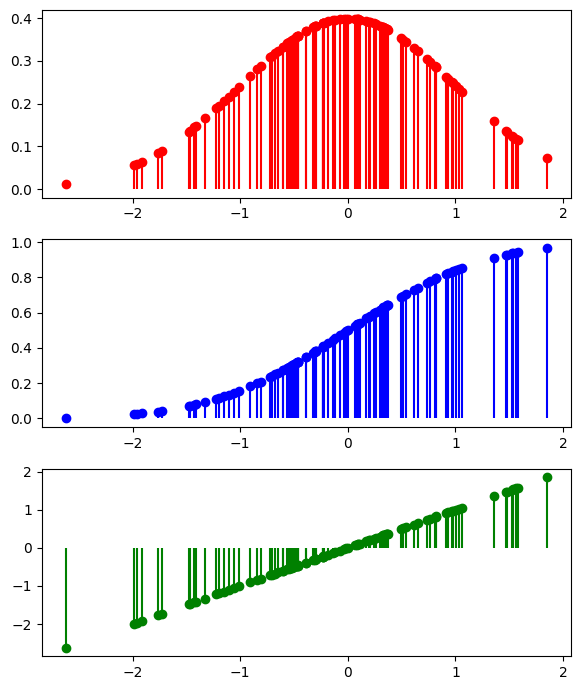

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#Parametros
np.random.seed(42)
n = 2000
mean = 0
sd = 1

#Datos
data_norm = norm.rvs(loc=mean, scale=sd, size=n)

#Funciones
pdf_norm = norm.pdf(data_norm, loc=mean, scale=sd)
cdf_norm = norm.cdf(data_norm, loc=mean, scale=sd)
ppf_norm = norm.ppf(norm.cdf(data_norm, loc=mean, scale=sd), loc=mean, scale=sd)

#Grafico
fig, axis = plt.subplots(3, 1, figsize=(6, 7))

axis[0].stem(data_norm[:100], pdf_norm[:100], linefmt='r-', markerfmt='ro', basefmt=' ')
axis[0]

axis[1].stem(data_norm[:100], cdf_norm[:100], linefmt='b-', markerfmt='bo', basefmt=' ')
axis[1]

axis[2].stem(data_norm[:100], ppf_norm[:100], linefmt='g-', markerfmt='go', basefmt=' ')
axis[2]

plt.tight_layout()
plt.show()

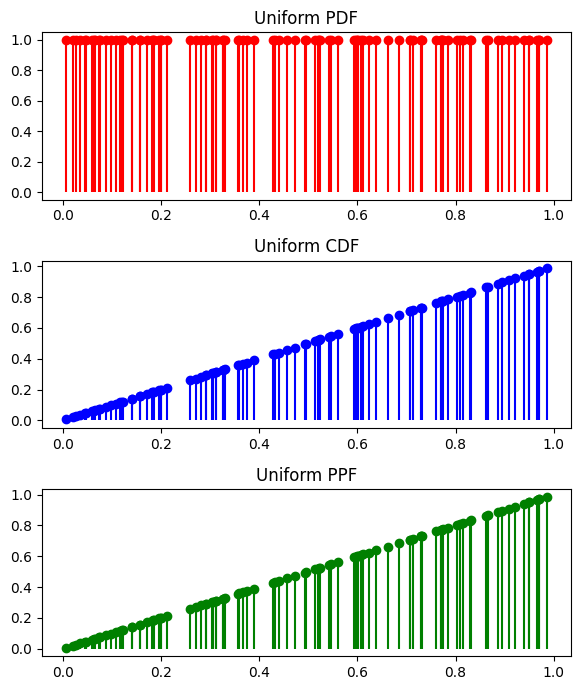

In [18]:
from scipy.stats import uniform

#Parametros
np.random.seed(42)
n = 2000
min_val = 0
max_val = 1

#Datos
data_unif = uniform.rvs(loc=min_val, scale=max_val - min_val, size=n)

#Funciones
pdf_unif = uniform.pdf(data_unif, loc=min_val, scale=max_val - min_val)
cdf_unif = uniform.cdf(data_unif, loc=min_val, scale=max_val - min_val)
ppf_unif = uniform.ppf(uniform.cdf(data_unif, loc=min_val, scale=max_val - min_val),
                       loc=min_val, scale=max_val - min_val)

#Grafico
fig, axis = plt.subplots(3, 1, figsize=(6, 7))

axis[0].stem(data_unif[:100], pdf_unif[:100], linefmt='r-', markerfmt='ro', basefmt=' ')
axis[0].set_title("Uniform PDF")

axis[1].stem(data_unif[:100], cdf_unif[:100], linefmt='b-', markerfmt='bo', basefmt=' ')
axis[1].set_title("Uniform CDF")

axis[2].stem(data_unif[:100], ppf_unif[:100], linefmt='g-', markerfmt='go', basefmt=' ')
axis[2].set_title("Uniform PPF")

plt.tight_layout()
plt.show()